<a href="https://colab.research.google.com/github/69421/mbacke2801/blob/main/Lab_21_Bar_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [1]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-06-05 20:40:20--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  70.5MB/s    in 2.2s    

2025-06-05 20:40:23 (70.5 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



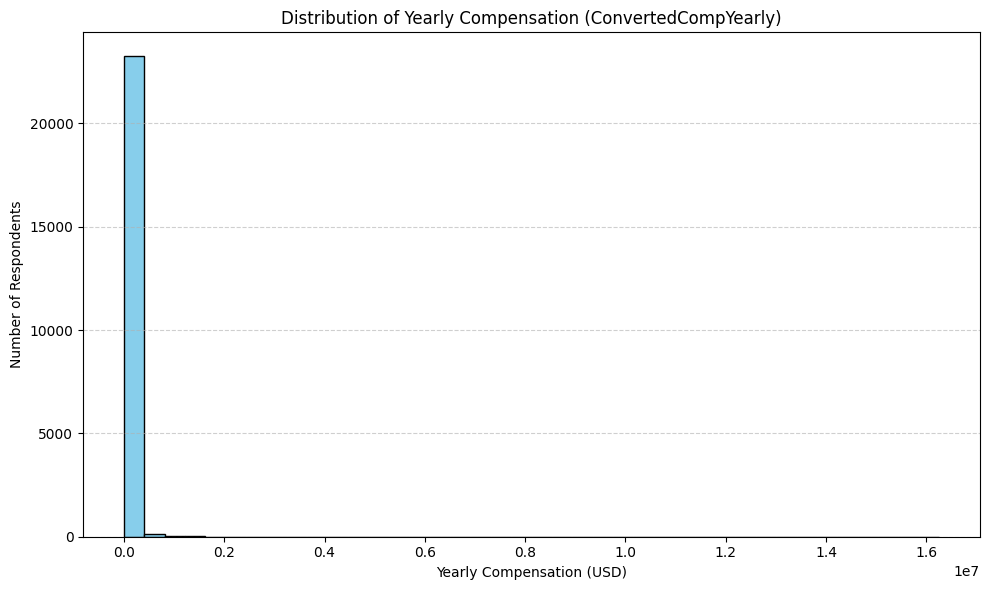

In [2]:


# Nettoyer : enlever les valeurs manquantes pour la compensation
comp_clean = df['ConvertedCompYearly'].dropna()

# Tracer l'histogramme
plt.figure(figsize=(10,6))
plt.hist(comp_clean, bins=40, color='skyblue', edgecolor='black')
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



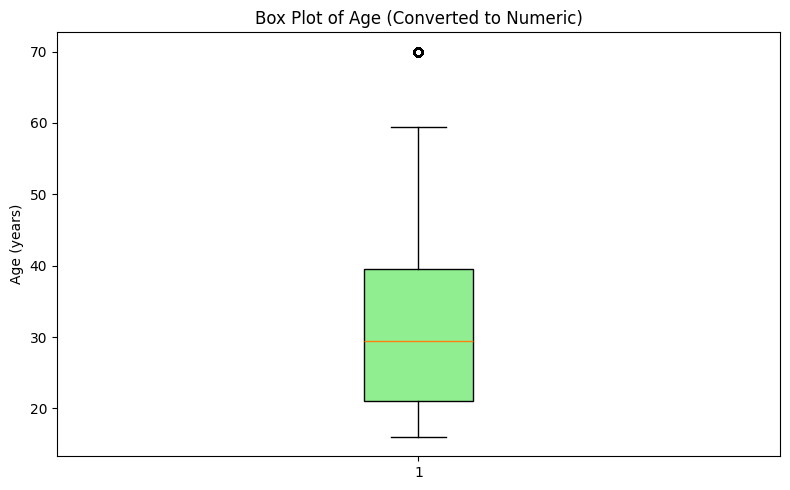

In [3]:
## Write your code here
## Write your code here

# Définir un mapping pour convertir les catégories d'âge en valeurs numériques (médiane de chaque tranche)
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

# Appliquer le mapping
df['Age_numeric'] = df['Age'].map(age_map)

# Nettoyer : enlever les valeurs manquantes
age_numeric_clean = df['Age_numeric'].dropna()

# Tracer le box plot
plt.figure(figsize=(8,5))
plt.boxplot(age_numeric_clean, vert=True, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Box Plot of Age (Converted to Numeric)')
plt.ylabel('Age (years)')
plt.tight_layout()
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



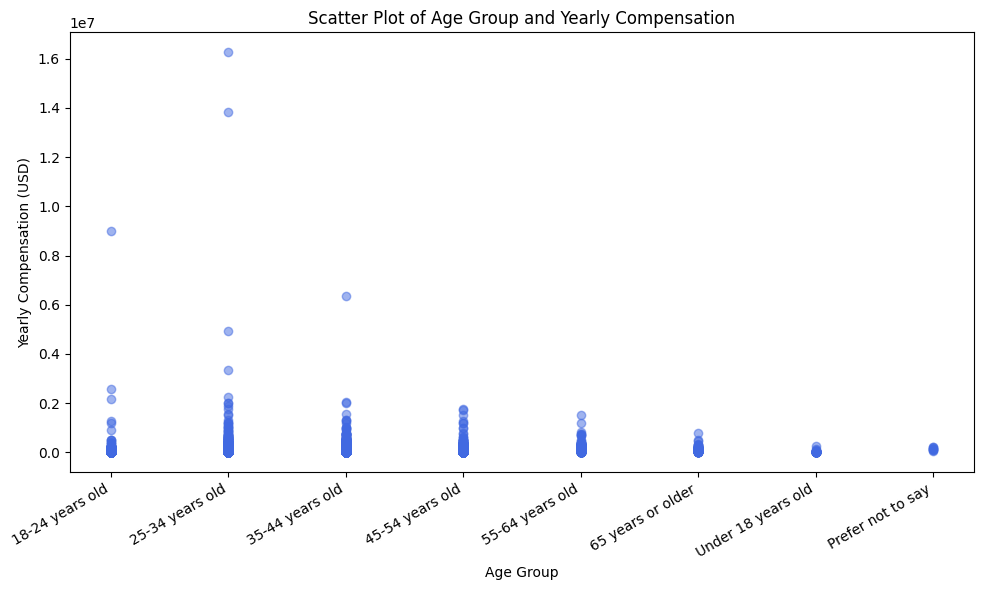

In [4]:
## Write your code here
## Write your code here

# Nettoyer : enlever les valeurs manquantes pour Age et ConvertedCompYearly
df_scatter = df.dropna(subset=['Age', 'ConvertedCompYearly'])

# Utiliser Age tel quel (catégorique) sur l'axe des x
plt.figure(figsize=(10,6))
plt.scatter(df_scatter['Age'], df_scatter['ConvertedCompYearly'], alpha=0.5, color='royalblue')
plt.title('Scatter Plot of Age Group and Yearly Compensation')
plt.xlabel('Age Group')
plt.ylabel('Yearly Compensation (USD)')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


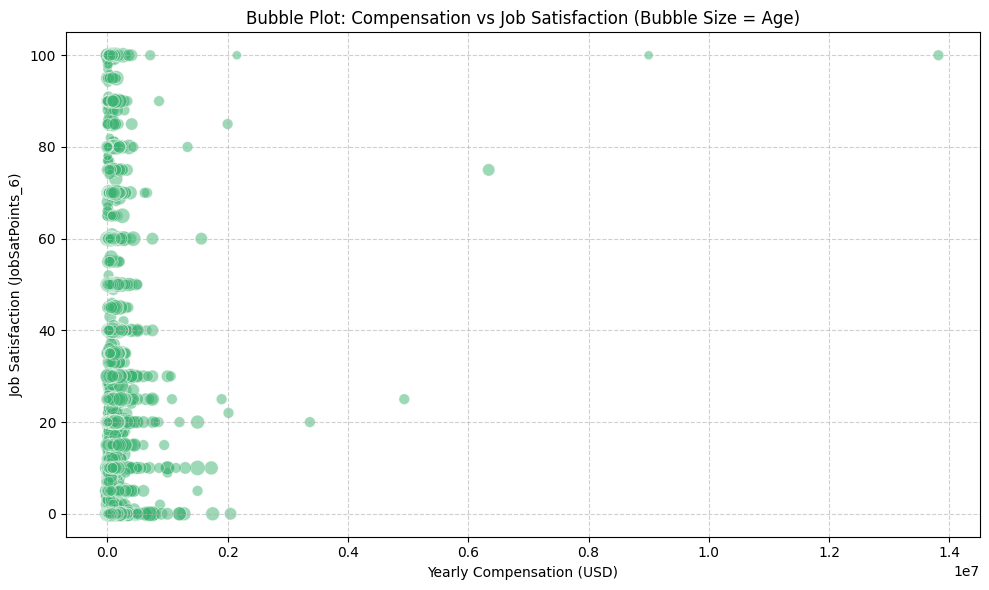

In [7]:
## Write your code here

# Nettoyer : enlever les valeurs manquantes pour les trois colonnes nécessaires
df_bubble = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric'])

plt.figure(figsize=(10,6))
plt.scatter(
    df_bubble['ConvertedCompYearly'],
    df_bubble['JobSatPoints_6'],
    s=df_bubble['Age_numeric']*2,  # Taille des bulles proportionnelle à l'âge
    alpha=0.5,
    color='mediumseagreen',
    edgecolors='w',
    linewidth=0.5
)
plt.title('Bubble Plot: Compensation vs Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



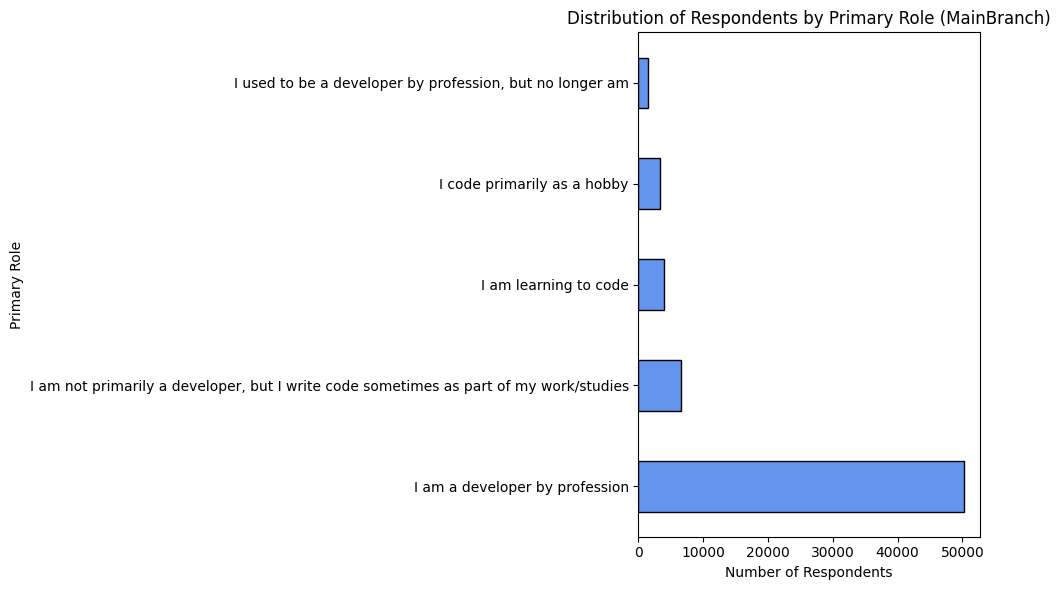

In [8]:
## Write your code here
## Write your code here

# Compter le nombre de répondants par rôle principal
mainbranch_counts = df['MainBranch'].value_counts()

# Tracer le bar chart horizontal
plt.figure(figsize=(10,6))
mainbranch_counts.plot(kind='barh', color='cornflowerblue', edgecolor='black')
plt.title('Distribution of Respondents by Primary Role (MainBranch)')
plt.xlabel('Number of Respondents')
plt.ylabel('Primary Role')
plt.tight_layout()
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



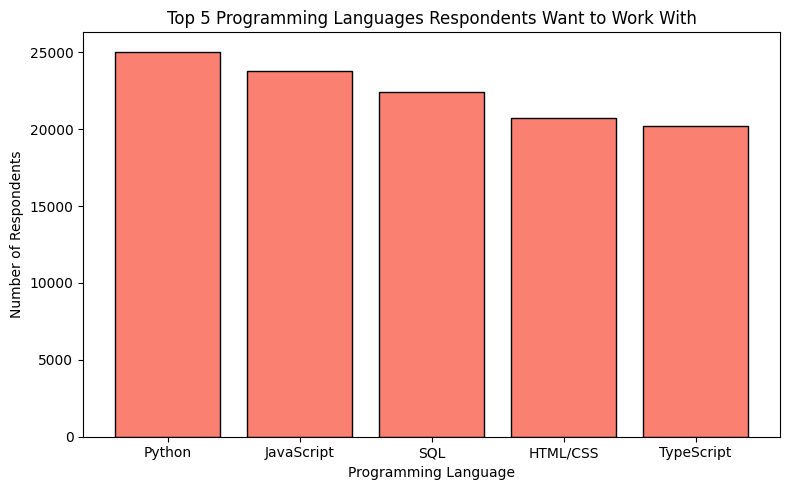

In [10]:
## Write your code here

# Nettoyer : enlever les valeurs manquantes
lang_col = df['LanguageWantToWorkWith'].dropna()

# Séparer les langages (ils sont séparés par ';')
from collections import Counter
all_langs = []
for langs in lang_col:
    all_langs.extend([lang.strip() for lang in langs.split(';')])

# Compter les occurrences de chaque langage
lang_counts = Counter(all_langs)
top5 = lang_counts.most_common(5)
langs, counts = zip(*top5)

# Tracer le bar chart vertical
plt.figure(figsize=(8,5))
plt.bar(langs, counts, color='salmon', edgecolor='black')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


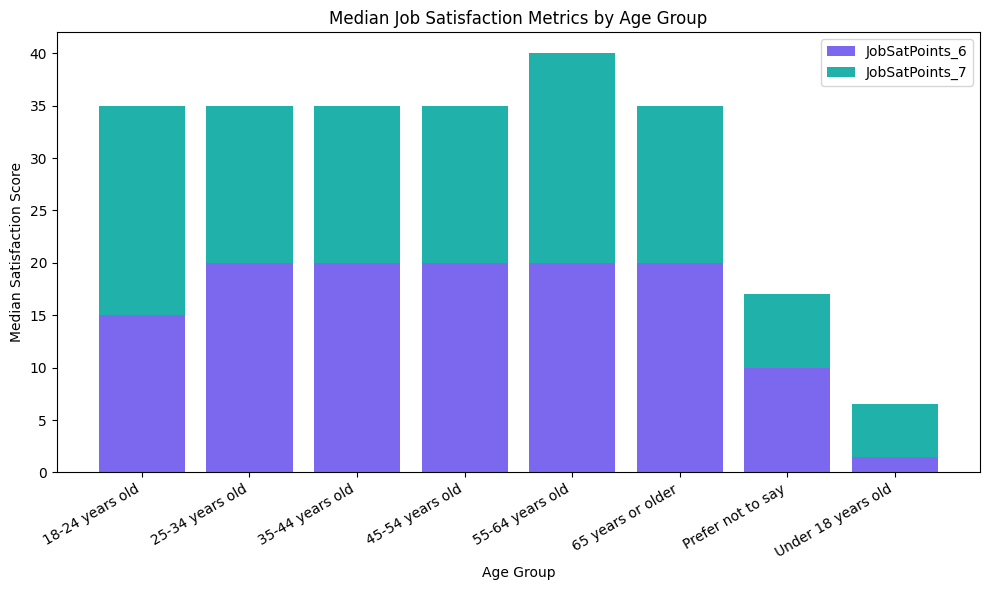

In [11]:
## Write your code here

# Nettoyer : enlever les valeurs manquantes pour Age, JobSatPoints_6 et JobSatPoints_7
df_stack = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])

# Calculer la médiane de chaque métrique de satisfaction par groupe d'âge
medians = df_stack.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Tracer le stacked bar chart
plt.figure(figsize=(10,6))
plt.bar(medians.index, medians['JobSatPoints_6'], label='JobSatPoints_6', color='mediumslateblue')
plt.bar(medians.index, medians['JobSatPoints_7'], bottom=medians['JobSatPoints_6'], label='JobSatPoints_7', color='lightseagreen')
plt.title('Median Job Satisfaction Metrics by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Score')
plt.xticks(rotation=30, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



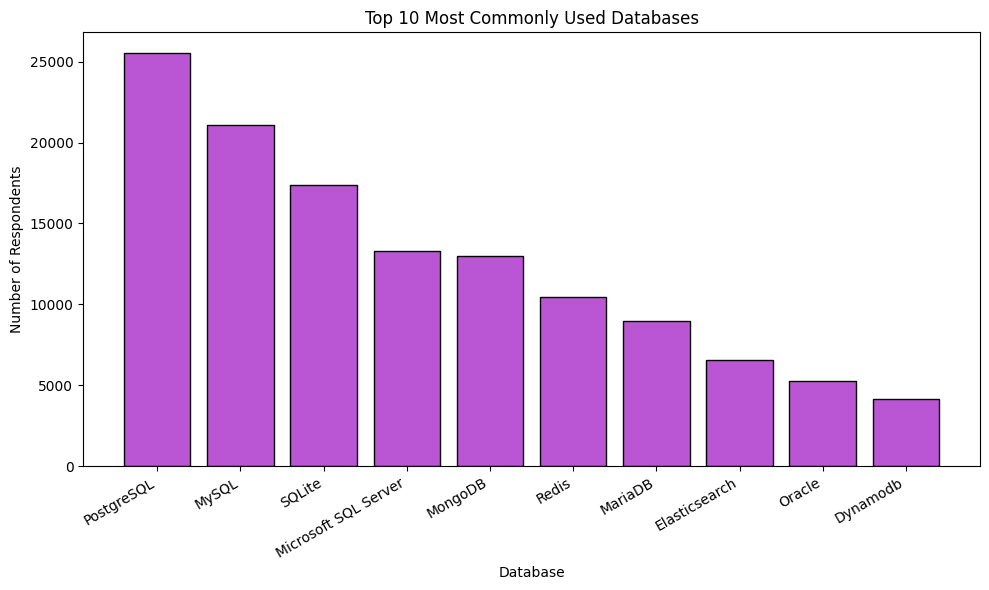

In [12]:
## Write your code here

# Nettoyer : enlever les valeurs manquantes
db_col = df['DatabaseHaveWorkedWith'].dropna()

# Séparer les bases de données (elles sont séparées par ';')
from collections import Counter
all_dbs = []
for dbs in db_col:
    all_dbs.extend([db.strip() for db in dbs.split(';')])

# Compter les occurrences de chaque base de données
db_counts = Counter(all_dbs)
top10 = db_counts.most_common(10)
db_names, db_freqs = zip(*top10)

# Tracer le bar chart vertical
plt.figure(figsize=(10,6))
plt.bar(db_names, db_freqs, color='mediumorchid', edgecolor='black')
plt.title('Top 10 Most Commonly Used Databases')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



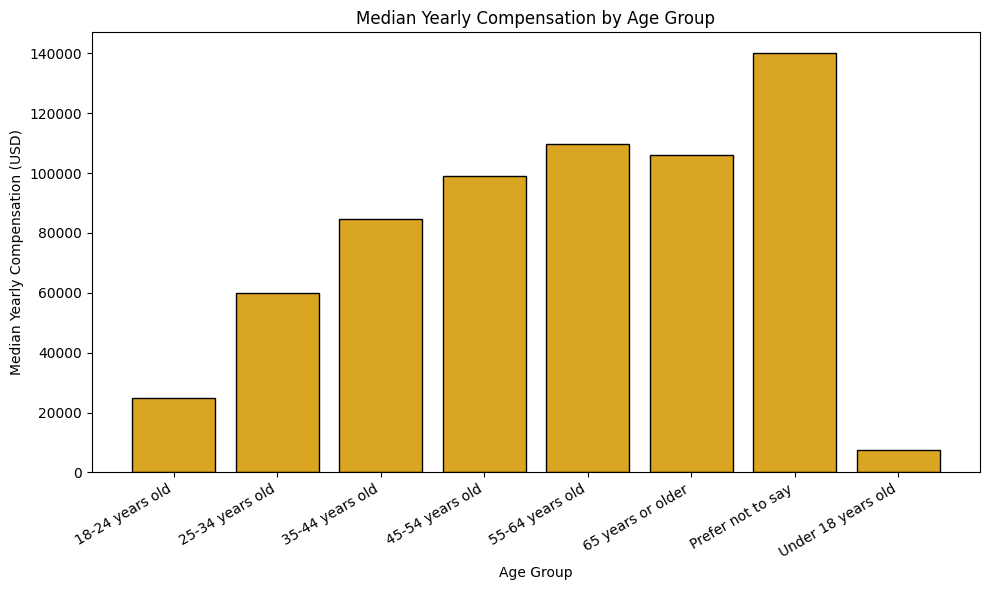

In [13]:
## Write your code here

# Nettoyer : enlever les valeurs manquantes pour Age et ConvertedCompYearly
df_grouped = df.dropna(subset=['Age', 'ConvertedCompYearly'])

# Calculer la médiane de la compensation par groupe d'âge
median_comp = df_grouped.groupby('Age')['ConvertedCompYearly'].median().sort_index()

# Tracer le grouped bar chart (ici, un simple bar chart car une seule variable par groupe)
plt.figure(figsize=(10,6))
plt.bar(median_comp.index, median_comp.values, color='goldenrod', edgecolor='black')
plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation (USD)')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



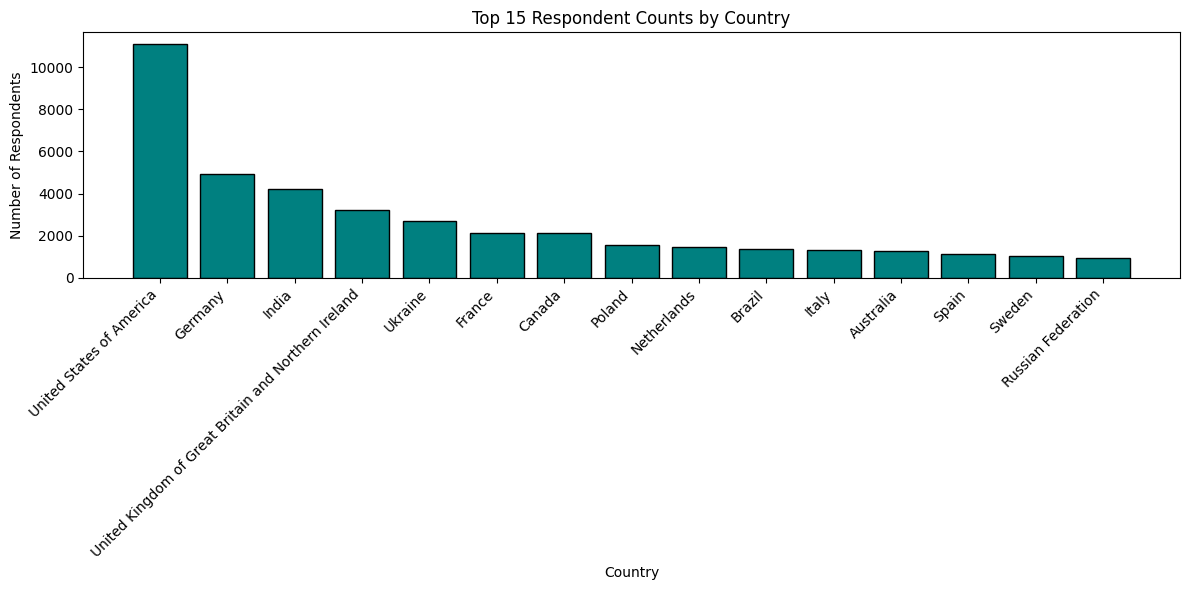

In [14]:
## Write your code here

# Compter le nombre de répondants par pays
country_counts = df['Country'].value_counts().head(15)  # Top 15 pays pour la lisibilité

# Tracer le bar chart vertical
plt.figure(figsize=(12,6))
plt.bar(country_counts.index, country_counts.values, color='teal', edgecolor='black')
plt.title('Top 15 Respondent Counts by Country')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
